# Assignment 8
by [Jay Nakum](https://jaynakum.github.io) [20BCP304D]

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DATA = pd.read_csv('./datasets/marketing_campaign.csv', sep='\t')
DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
DATA['Education'] = en.fit_transform(DATA['Education'])
DATA['Marital_Status'] = en.fit_transform(DATA['Marital_Status'])
DATA['Dt_Customer'] = pd.to_datetime(DATA['Dt_Customer'], format='%d-%m-%Y')
DATA

In [ ]:
DATA.isna().sum().sort_values(ascending=False)

In [82]:
DATA['Income'].fillna(DATA['Income'].mean(),inplace=True)

In [ ]:
DATA.isna().any()

In [84]:
DATA.shape

(2240, 29)

In [85]:
dates = DATA['Dt_Customer']
data = DATA.drop('Dt_Customer', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data = pd.DataFrame(sc.transform(data), columns=data.columns)
data['Dt_Customer'] = dates
data

In [87]:
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
pip = Pipeline([('Constant', DropConstantFeatures(tol=0.98)), ('Duplicate', DropDuplicateFeatures()), ('Correlated', SmartCorrelatedSelection())])

In [ ]:
data = pip.fit_transform(data)
data.shape

In [ ]:
data.head()

In [ ]:
X = data.drop(['ID','Dt_Customer'], axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(X)
pca.explained_variance_ratio_

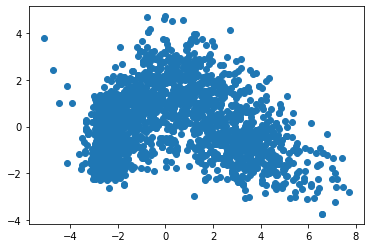

In [91]:
plt.scatter(x_new[:,0], x_new[:,1])

Text(0, 0.5, 'Euclidian Distance')

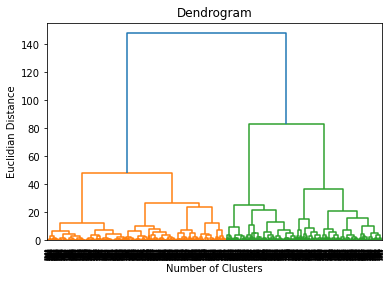

In [92]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x_new, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Number of Clusters')
plt.ylabel("Euclidian Distance")

In [93]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model = AgglomerativeClustering(n_clusters=3)
Y = model.fit_predict(x_new)
silhouette_score(x_new, Y)

0.49039009000844413

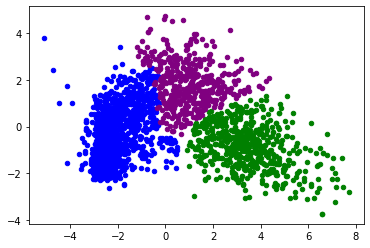

In [94]:
plt.scatter(x=x_new[Y==0, 0], y=x_new[Y==0,1], c='blue', s=20, label='Cluster-1')
plt.scatter(x=x_new[Y==1, 0], y=x_new[Y==1,1], c='green', s=20, label='Cluster-2')
plt.scatter(x=x_new[Y==2, 0], y=x_new[Y==2,1], c='purple', s=20, label='Cluster-3')